<a href="https://colab.research.google.com/github/Tatsuyuki-Matsuda/EU_M_Math-Repository/blob/main/Advanced_Mathematics_Chapter3_TU22015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

'%.3f'

In [84]:
from sklearn import linear_model

In [85]:
pwd

'/content/chap3/chap3'

In [86]:
mkdir chap3

In [87]:
cd ./chap3

/content/chap3/chap3/chap3


In [88]:
import requests, zipfile
from io import StringIO
import io

In [89]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [90]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [91]:
student_data_math = pd.read_csv('student-mat.csv')

In [92]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [93]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [94]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [95]:
?pd.read_csv

In [96]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [97]:
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [98]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [99]:
student_data_math.groupby('sex')['absences'].mean()

sex
F    6.216346
M    5.144385
Name: absences, dtype: float64

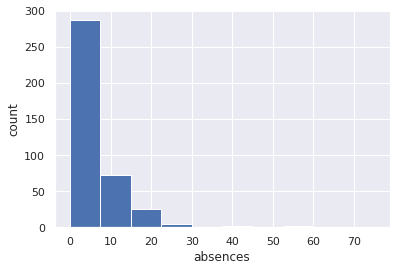

In [100]:
plt.hist(student_data_math['absences'])

plt.xlabel('absences')
plt.ylabel('count')

plt.grid(True)

In [101]:
print('平均値 :', student_data_math['absences'].mean())
print('中央値 :', student_data_math['absences'].median())
print('最頻値 :', student_data_math['absences'].mode())

平均値 : 5.708860759493671
中央値 : 4.0
最頻値 : 0    0
dtype: int64


In [102]:
#分散
student_data_math['absences'].var(ddof=0)

63.887

In [103]:
#標準偏差
student_data_math['absences'].std(ddof=0)

7.993

In [104]:
#平方根
np.sqrt(student_data_math['absences'].var(ddof=0))

7.993

In [105]:
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [106]:
#四分位範囲
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.000

In [107]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


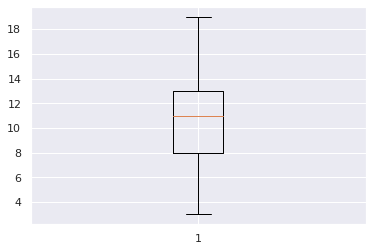

In [108]:
#箱ひげ図
plt.boxplot(student_data_math['G1'])
plt.grid(True)

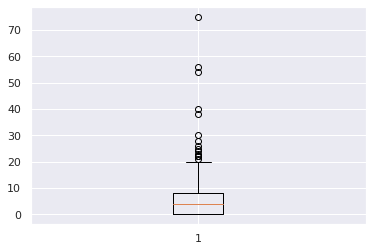

In [109]:
plt.boxplot(student_data_math['absences'])
plt.grid(True)

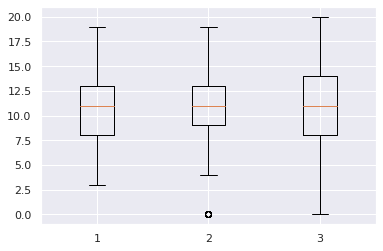

In [110]:
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

In [111]:
#変動係数
student_data_math['absences'].std(ddof=0) / student_data_math['absences'].mean()

1.400

In [112]:
student_data_math.std(ddof=0) / student_data_math.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age           0.076330
Medu          0.397673
Fedu          0.431019
traveltime    0.481058
studytime     0.411791
failures      2.222501
famrel        0.227042
freetime      0.308334
goout         0.357645
Dalc          0.600679
Walc          0.561409
health        0.390651
absences      1.400097
G1            0.303881
G2            0.350641
G3            0.439324
dtype: float64

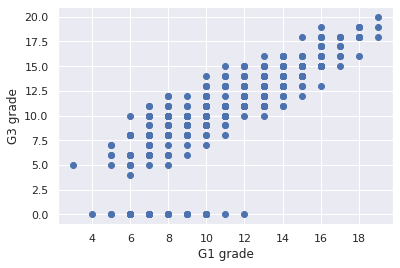

In [113]:
#散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [114]:
#共分散
np.cov(student_data_math['G1'], student_data_math['G3'], ddof=0)

array([[10.989, 12.157],
       [12.157, 20.936]])

In [115]:
#分散
print('G1の分散 :', student_data_math['G1'].var(ddof=0))
print('G3の分散 :', student_data_math['G3'].var(ddof=0))

G1の分散 : 10.989161993270304
G3の分散 : 20.93647812850505


In [116]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

(0.801, 0.000)

In [117]:
#相関行列
np.corrcoef([student_data_math['G1'], student_data_math['G3']])

array([[1.   , 0.801],
       [0.801, 1.   ]])

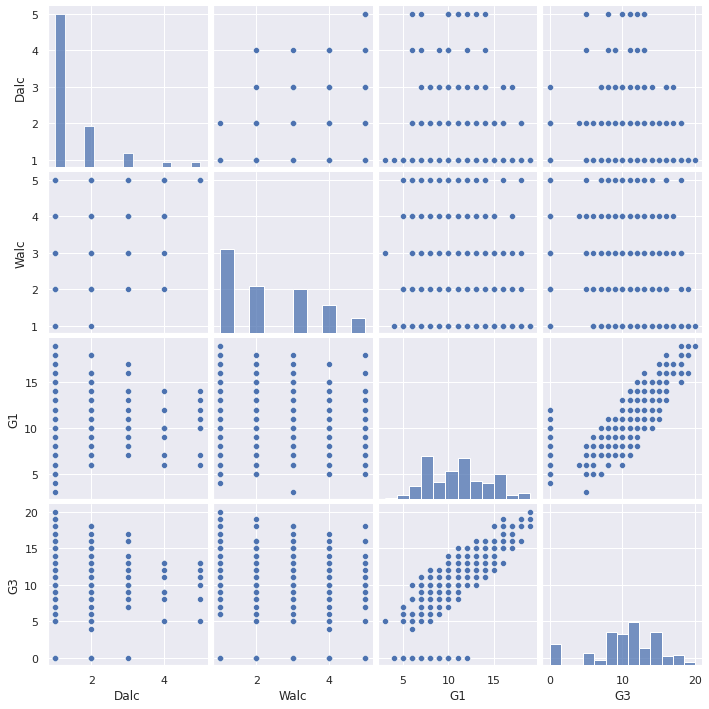

In [118]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [119]:
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

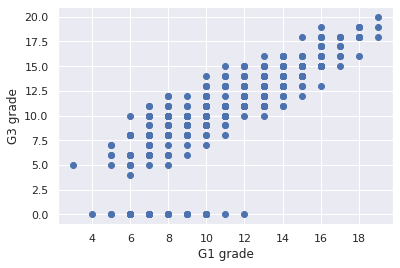

In [120]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [121]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

In [122]:
X = student_data_math.loc[:, ['G1']].values

Y = student_data_math['G3'].values

reg.fit(X, Y)

print('回帰係数 :', reg.coef_)

print('切片 :', reg.intercept_)

回帰係数 : [1.106]
切片 : -1.6528038288004634


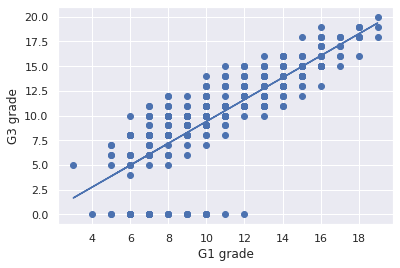

In [123]:
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

plt.plot(X, reg.predict(X))
plt.grid(True)

In [124]:
#決定係数
print('決定係数 :', reg.score(X, Y))

決定係数 : 0.6423508460522701
